# Multiple Linear Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/Machine+Learning+A-Z+(Codes+and+Datasets).zip (Unzipped Files)/Machine+Learning+A-Z+(Codes+and+Datasets)/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 5 - Multiple Linear Regression/Python/50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

## Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

print(X_train)

[[0.0 1.0 0.0 -0.3500645436227844 -0.7854710924793271 0.1011968019362538]
 [0.0 0.0 1.0 -0.555303187426314 -1.481174262628151 0.02734979174277092]
 [0.0 1.0 0.0 0.07935762307586282 0.8013338146656704 -0.551521323997471]
 [1.0 0.0 0.0 -0.5463823849331263 1.3250581707161837 0.07011683779235604]
 [0.0 1.0 0.0 0.4348537132854595 -0.3559866348200946 0.7514851578736048]
 [0.0 1.0 0.0 1.2694314288195354 0.855185185174973 0.986031184474382]
 [0.0 1.0 0.0 1.045250070905001 1.2807704710942711 0.44039999942558483]
 [0.0 0.0 1.0 -1.529843000700978 0.029420649133439825 -1.6218751012780783]
 [0.0 0.0 1.0 -1.5397625087372082 -2.767672641730695 -1.6372965026688253]
 [0.0 0.0 1.0 -0.13115188245559178 1.144977005989267 -0.7694999122824163]
 [0.0 0.0 1.0 0.927916133722245 -0.029920619212990152 0.4830316172654914]
 [0.0 1.0 0.0 -0.20932933131592557 -0.29937679537926 -0.8991541175619614]
 [1.0 0.0 0.0 -0.17870827894287686 0.2251351979981532 -1.2640164249123271]
 [1.0 0.0 0.0 0.13747089788308053 -0.06929437

## Training the Multiple Linear Regression model on the Training set

In [ ]:
class multipleLinearRegression():

  def __init__(self):
    #No instance Variables required
    pass

  def forward(self,X,y,W):
    """
    Parameters:
    X (array) : Independent Features
    y (array) : Dependent Features/ Target Variable
    W (array) : Weights 

    Returns:
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    y_pred (array) : Predicted Target Variable
    """
    y_pred = sum(W * X)
    loss = ((y_pred-y)**2)/2    #Loss = Squared Error, we introduce 1/2 for ease in the calculation
    return loss, y_pred

  def updateWeights(self,X,y_pred,y_true,W,alpha,index):
    """
    Parameters:
    X (array) : Independent Features
    y_pred (array) : Predicted Target Variable
    y_true (array) : Dependent Features/ Target Variable
    W (array) : Weights
    alpha (float) : learning rate
    index (int) : Index to fetch the corresponding values of W, X and y 

    Returns:
    W (array) : Update Values of Weight
    """
    for i in range(X.shape[1]):
      #alpha = learning rate, rest of the RHS is derivative of loss function
      W[i] -= (alpha * (y_pred-y_true[index])*X[index][i]) 
    return W

  def train(self, X, y, epochs=10, alpha=0.001, random_state=0):
    """
    Parameters:
    X (array) : Independent Feature
    y (array) : Dependent Features/ Target Variable
    epochs (int) : Number of epochs for training, default value is 10
    alpha (float) : learning rate, default value is 0.001

    Returns:
    y_pred (array) : Predicted Target Variable
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    """

    num_rows = X.shape[0] #Number of Rows
    num_cols = X.shape[1] #Number of Columns 
    W = np.random.randn(1,num_cols) / np.sqrt(num_rows) #Weight Initialization

    #Calculating Loss and Updating Weights
    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]
    for j in range(epochs):
      cost=0
      np.random.seed(random_state)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred = self.forward(X[i],y[i],W[0])
        cost+=loss
        W[0] = self.updateWeights(X,y_pred,y,W[0],alpha,i)
      train_loss.append(cost)
      num_epochs.append(j)
    return W[0], train_loss, num_epochs

  def test(self, X_test, y_test, W_trained):
    """
    Parameters:
    X_test (array) : Independent Features from the Test Set
    y_test (array) : Dependent Features/ Target Variable from the Test Set
    W_trained (array) : Trained Weights
    test_indices (list) : Index to fetch the corresponding values of W_trained,
                          X_test and y_test 

    Returns:
    test_pred (list) : Predicted Target Variable
    test_loss (list) : Calculated Sqaured Error Loss for y and y_pred
    """
    test_pred = []
    test_loss = []
    test_indices = [i for i in range(X_test.shape[0])]
    for i in test_indices:
        loss, y_test_pred = self.forward(X_test[i], W_trained, y_test[i])
        test_pred.append(y_test_pred)
        test_loss.append(loss)
    return test_pred, test_loss
    

  def predict(self, W_trained, X_sample):
    prediction = sum(W_trained * X_sample)
    return prediction

  def plotLoss(self, loss, epochs):
    """
    Parameters:
    loss (list) : Calculated Sqaured Error Loss for y and y_pred
    epochs (list): Number of Epochs

    Returns: None
    Plots a graph of Loss vs Epochs
    """
    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()

In [ ]:
#Training 
regressor = multipleLinearRegression()
W_trained, train_loss, num_epochs = regressor.train(X_train, y_train, epochs=200, alpha=0.0001)
print(W_trained)

[28827.21 19555.16 28191.3  17691.43  4864.31 12096.31]


In [ ]:
test_pred, test_loss = regressor.test(X_test, y_test, W_trained)
print(test_pred)

[256872.28879492817, 114385.20394306075, 201562.64914284888, -135908.47807820275, 683585.0267020644, 252631.21444287495, -200569.4983838138, 95686.77122258605, 203763.11957622494, 435010.493978288]


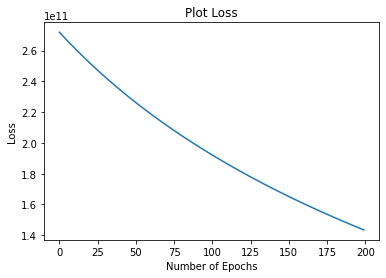

In [ ]:
#Plot the Train Loss
regressor.plotLoss(train_loss, num_epochs)

## Predicting the Test set results

In [ ]:
# y_pred = regressor.predict(W_trained, X_test)
test_pred = np.array(test_pred)
# print(y_pred.reshape(len(y_pred),1))
# print(y_test.reshape(len(y_test),1))
# np.set_printoptions(precision=2)
print(np.concatenate((test_pred.reshape(len(test_pred),1), y_test.reshape(len(y_test),1)),1))
# print(y_test.reshape(len(y_test),1))

[[ 256872.29  103282.38]
 [ 114385.2   144259.4 ]
 [ 201562.65  146121.95]
 [-135908.48   77798.83]
 [ 683585.03  191050.39]
 [ 252631.21  105008.31]
 [-200569.5    81229.06]
 [  95686.77   97483.56]
 [ 203763.12  110352.25]
 [ 435010.49  166187.94]]


In [ ]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_pred , y_test) )

Mean absolute error: 173859.84
Residual sum of squares (MSE): 49801451462.80
R2-score: 0.15
